# Random Forest

Para sabermos se existe cancro do pulmão, utilizamos o modelo Random Forest, que cria uma variedade de árvores de decisão com hiperparâmetros aleatórios. O modelo escolhe a melhor árvore de decisão para cada caso. Escolhemos este modelo porque é um bom algoritmo para dados com muitas features.

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

Juntámos as features extraídas do pyradiomics com as features do pylidc

In [145]:
anotations_path="annotations_features.csv"
pyradiomics_path="extracted_features_transposed.xlsx"
annotations =pd.read_csv(anotations_path)
pyradiomics= pd.read_excel(pyradiomics_path)
pyradiomics= pyradiomics.drop(0, axis=1)
annotations.set_index("id",inplace = True)
pyradiomics.set_index("id",inplace=True)

junction= pyradiomics.join(annotations,on="id", how="inner")

junction.to_csv("junction.csv")

In [146]:
#Verificámos as features que temos disponíveis

all_features= pd.read_csv("junction.csv")
all_features.info()

for i in all_features.keys():
    print(i)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Columns: 128 entries, id to malignancy
dtypes: float64(97), int64(13), object(18)
memory usage: 184.1+ KB
id
diagnostics_Versions_PyRadiomics
diagnostics_Versions_Numpy
diagnostics_Versions_SimpleITK
diagnostics_Versions_PyWavelet
diagnostics_Versions_Python
diagnostics_Configuration_Settings
diagnostics_Configuration_EnabledImageTypes
diagnostics_Image-original_Hash
diagnostics_Image-original_Dimensionality
diagnostics_Image-original_Spacing
diagnostics_Image-original_Size
diagnostics_Image-original_Mean
diagnostics_Image-original_Minimum
diagnostics_Image-original_Maximum
diagnostics_Mask-original_Hash
diagnostics_Mask-original_Spacing
diagnostics_Mask-original_Size
diagnostics_Mask-original_BoundingBox
diagnostics_Mask-original_VoxelNum
diagnostics_Mask-original_VolumeNum
diagnostics_Mask-original_CenterOfMassIndex
diagnostics_Mask-original_CenterOfMass
original_firstorder_10Percentile
original_firstorder_90Perc

Eliminámos as colunas que apenas tinham um valor que era igual para todos os casos.

E também eliminámos as colunas que tinham valores em hash e valores que pensávamos não ser importantes.

In [147]:
df = pd.read_csv("junction.csv")
df.head()
lis=[]
for i in df.keys():
    if(len(df[i].unique())==1):
        lis.append(i)
for i in lis:
    df=df.drop(i,axis=1)
los=[]
for i in df.keys():
    try:
        df[i].astype(float)
    except:
        los.append(i)
for i in los:
    if i == "id":
        continue
    df=df.drop(i,axis=1)
df.head()
    


,id,diagnostics_Image-original_Mean,diagnostics_Mask-original_VoxelNum,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_Kurtosis,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Minimum,original_firstorder_Range,...,calcification,sphericity,margin,lobulation,spiculation,texture,diameter,surface_area,volume,malignancy
0,LIDC-IDRI-0068-2,127.797558,150145,9.736006e+09,0.129464,548.035170,0.819436,254.583483,96.0,159.0,...,6,4,5,1,1,5,10.159392,218.412236,279.066171,1
1,LIDC-IDRI-0068-3,128.026790,149977,9.733463e+09,0.116543,1368.003803,0.529379,254.731219,97.0,158.0,...,6,3,5,1,1,5,5.358704,49.669648,40.596753,0
2,LIDC-IDRI-0068-4,128.882328,150187,9.736609e+09,0.132381,478.151780,0.893741,254.545587,93.0,162.0,...,6,4,5,1,1,5,12.510067,336.993531,470.878528,1
3,LIDC-IDRI-0068-5,129.499643,150322,9.738553e+09,0.141223,336.558058,1.131161,254.424356,92.0,163.0,...,6,4,5,1,2,5,14.026190,494.603737,866.258778,1
4,LIDC-IDRI-0072-0,132.816048,151672,9.757064e+09,0.216176,84.257971,3.509849,253.197808,89.0,166.0,...,6,3,1,3,4,3,43.473965,4084.414220,9110.684822,1


Usando o KBest, selecionámos as melhores features.

In [148]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [149]:
array = df.values
X = array[:,1:-2]
Y = array[:,-1]
Y=Y.astype('int')
df.head()

test = SelectKBest(score_func=mutual_info_classif, k=30)
fit = test.fit(X, Y)

In [150]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


Num Features: 49
Selected Features: [ True  True  True False  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True False False False False False
 False False False False False False False False False False False  True
 False  True False  True False False  True False  True False  True False
 False False  True False  True False False  True  True  True  True False
 False  True False False  True False  True False  True False  True  True
  True  True  True False  True False False False False  True False  True
  True False False False False  True False  True False  True  True  True
 False  True  True]
Feature Ranking: [ 1  1  1 24  1  1  1  1  1  1  1  1 35  1  1  1  1  1  1 17 20 16  4 32
 30 39 38 19 11 45  9 22  5 33 26  1  6  1 23  1 36 25  1 12  1 18  1 31
 46 49  1 51  1 29  2  1  1  1  1 40 13  1 34 42  1 41  1 44  1 10  1  1
  1  1  1 27  1 14 37 15 43  1 50  1  1 47  8 48 28  1 21  1  3  1  1  1
  7  1  1]


In [151]:
count= 0
lis=[]
for i in  fit.support_:
    if(i==True):
        lis.append(count)
    count+=1

In [152]:
print(lis)

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 35, 37, 39, 42, 44, 46, 50, 52, 55, 56, 57, 58, 61, 64, 66, 68, 70, 71, 72, 73, 74, 76, 81, 83, 84, 89, 91, 93, 94, 95, 97, 98]


In [153]:
count=0
index=0
features=[]
for i in df.keys():
    if i == 'id':
        continue
    if(count==lis[index]):
        features.append(i)
        index+=1
    count+=1
    if(index ==len(lis)):
        break
print(features)
    

['diagnostics_Image-original_Mean', 'diagnostics_Mask-original_VoxelNum', 'original_firstorder_Energy', 'original_firstorder_Kurtosis', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean', 'original_firstorder_Minimum', 'original_firstorder_Range', 'original_firstorder_RootMeanSquared', 'original_firstorder_Skewness', 'original_firstorder_TotalEnergy', 'original_firstorder_Variance', 'original_glcm_Autocorrelation', 'original_glcm_ClusterProminence', 'original_glcm_ClusterShade', 'original_glcm_ClusterTendency', 'original_glcm_Contrast', 'original_glcm_SumAverage', 'original_glcm_SumSquares', 'original_gldm_DependenceNonUniformity', 'original_gldm_GrayLevelNonUniformity', 'original_gldm_HighGrayLevelEmphasis', 'original_gldm_LargeDependenceHighGrayLevelEmphasis', 'original_gldm_SmallDependenceHighGrayLevelEmphasis', 'original_glrlm_GrayLevelNonUniformity', 'original_glrlm_HighGrayLevelRunEmphasis', 'original_glrlm_LongRunEmphasis', 'original_glrlm_LongRunHighGrayLev

A partir das melhores features, criámos o último ficheiro csv que contém as features selecionadas e o target.

In [154]:
colunas_para_manter = features  

df_best_features = df.loc[:, colunas_para_manter]

df_best_features.head()

df_best_features.to_csv("best_features.csv")

df_best_features_with_id = df.loc[:,["id"] +colunas_para_manter]




Função para verificar se um certo paciente está no dataset

In [155]:
def selected_pacient(pacient):
    for i in  df_best_features_with_id['id']:
        if(i.startswith(pacient)):
            return 'In dataset'
    return 'Not in dataset'

#Exemplo
df_best_features_with_id.head()
selected_pacient('LIDC-IDRI-0068')

'In dataset'

# Modelo Random Forest

## Default
Criámos o modelo Random Forest com os hiperparâmetros default

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =train_test_split(df_best_features,Y, test_size=0.3)

RandomForest = RandomForestClassifier(random_state=42)
RandomForest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [157]:
prediction=RandomForest.predict(X_test)

In [158]:

accuracy = accuracy_score(Y_test, prediction)
precision = precision_score(Y_test, prediction)
recall = recall_score(Y_test, prediction)
f1 = f1_score(Y_test, prediction)
print(f"Accuracy = {accuracy} ")
print(f"Precision = {precision}")
print(f"Recall = {recall} ")
print(f"F1 = {f1} ")

Accuracy = 0.8571428571428571 
Precision = 0.6666666666666666
Recall = 0.9333333333333333 
F1 = 0.7777777777777778 


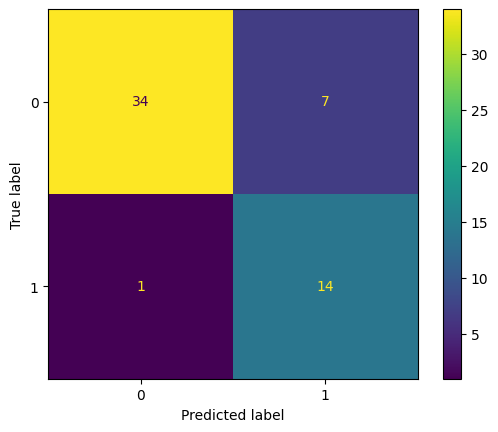

In [159]:
cm=confusion_matrix(Y_test, prediction)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

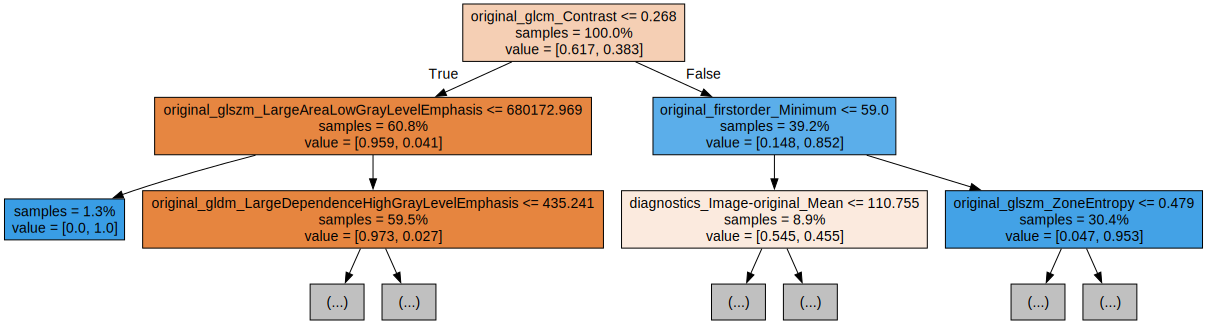

In [160]:
from sklearn.tree import export_graphviz
import graphviz

i = 0
tree = RandomForest.estimators_[i]

dot_data = export_graphviz(tree,
                            feature_names=X_train.columns,  
                            filled=True,  
                            max_depth=2, 
                            impurity=False, 
                            proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

## RandomizedSearchCV

Criámos um outro modelo Random Forest com os hiperparâmetros dados pelo RandomizedSearchCV

In [161]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [162]:
rf_random = RandomizedSearchCV(estimator = RandomForest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   3.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   3.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   3.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   1.6s
[CV] END bootstrap=False, max_depth=10, max

c:\Users\anoca\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
123 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anoca\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anoca\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\anoca\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\sklearn\base.py", line 638, in _validate

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [163]:

n_estimators = rf_random.best_params_['n_estimators']
min_samples_split = rf_random.best_params_['min_samples_split']
min_samples_leaf = rf_random.best_params_['min_samples_leaf']
max_features = rf_random.best_params_['max_features']
max_depth = rf_random.best_params_['max_depth']
bootstrap = rf_random.best_params_['bootstrap']

rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [164]:
RF2 = RandomForestClassifier(n_estimators=n_estimators, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, max_depth=max_depth, bootstrap=bootstrap, random_state=42)
RF2.fit(X_train, Y_train)


RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_split=5,
                       n_estimators=600, random_state=42)

In [165]:
prediction2 =RF2.predict(X_test)


accuracy2 = accuracy_score(Y_test, prediction2)
precision2 = precision_score(Y_test, prediction2)
recall2 = recall_score(Y_test, prediction2)
f12 = f1_score(Y_test, prediction2)

print(f"Accuracy = {accuracy2} ")
print(f"Precision = {precision2} ")
print(f"Recall = {recall2} ")
print(f"F1 = {f12}")

Accuracy = 0.8392857142857143 
Precision = 0.6363636363636364 
Recall = 0.9333333333333333 
F1 = 0.7567567567567568


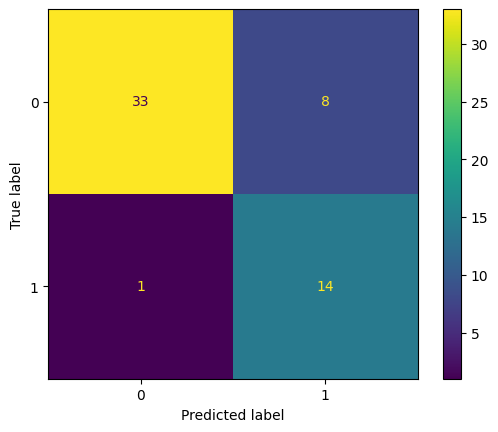

In [166]:
cm=confusion_matrix(Y_test, prediction2)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

## GridSearchCV

Por último, criámos um modelo Random Forest com os hiperparâmetros dados pelo GridSearchCV

In [167]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [5,15,20, 40],
    'max_features': ['auto',2,3],
    'min_samples_leaf': [1, 3, 4],
    'min_samples_split': [3,6,9],
    'n_estimators': [900, 1200, 2000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)
grid_search.best_params_



Fitting 3 folds for each of 324 candidates, totalling 972 fits


c:\Users\anoca\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
157 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anoca\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anoca\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\anoca\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\sklearn\base.py", line 638, in _validate

{'bootstrap': False,
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 900}

In [168]:

best_grid = grid_search.best_estimator_

n_estimators2 =grid_search.best_params_['n_estimators']
min_samples_split2 = grid_search.best_params_['min_samples_split']
min_samples_leaf2 = grid_search.best_params_['min_samples_leaf']
max_features2 = grid_search.best_params_['max_features']
max_depth2 = grid_search.best_params_['max_depth']
bootstrap2 = grid_search.best_params_['bootstrap']

best_grid



RandomForestClassifier(bootstrap=False, max_depth=5, max_features=2,
                       min_samples_split=6, n_estimators=900)

In [169]:
RF3 = RandomForestClassifier(n_estimators=n_estimators2, min_samples_split=min_samples_split2, min_samples_leaf=min_samples_leaf2, max_features=max_features2, max_depth=max_depth2, bootstrap=bootstrap2)

RF3.fit(X_train, Y_train)

prediction3 =RF3.predict(X_test)


In [170]:
accuracy3 = accuracy_score(Y_test, prediction3)
precision3 = precision_score(Y_test, prediction3)
recall3 = recall_score(Y_test, prediction3)
f13 = f1_score(Y_test, prediction3)
print(f"Accuracy = {accuracy3} ")
print(f"Precision = {precision3} ")
print(f"Recall = {recall3} ")
print(f"F1 = {f13}")

Accuracy = 0.8571428571428571 
Precision = 0.6666666666666666 
Recall = 0.9333333333333333 
F1 = 0.7777777777777778


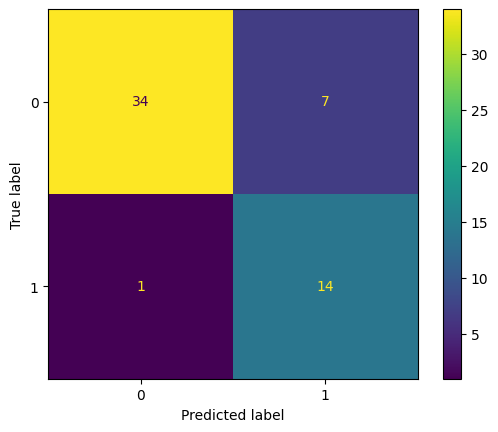

In [171]:
cm=confusion_matrix(Y_test, prediction3)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

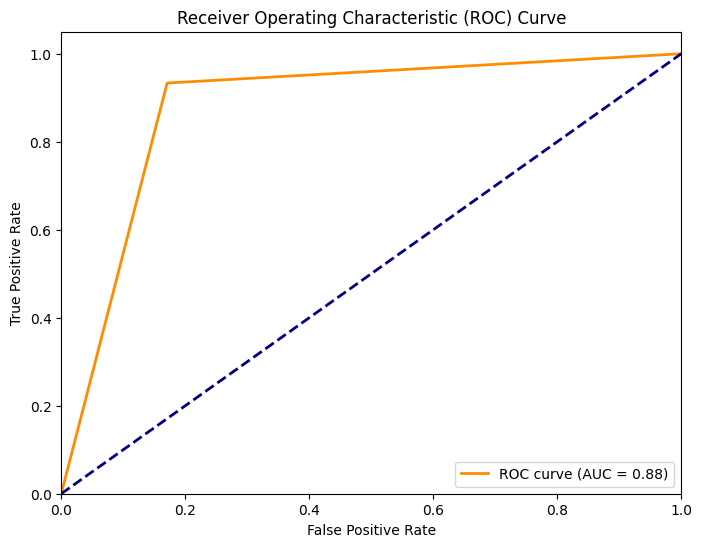

In [172]:
fpr, tpr, thresholds = roc_curve(Y_test, prediction)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

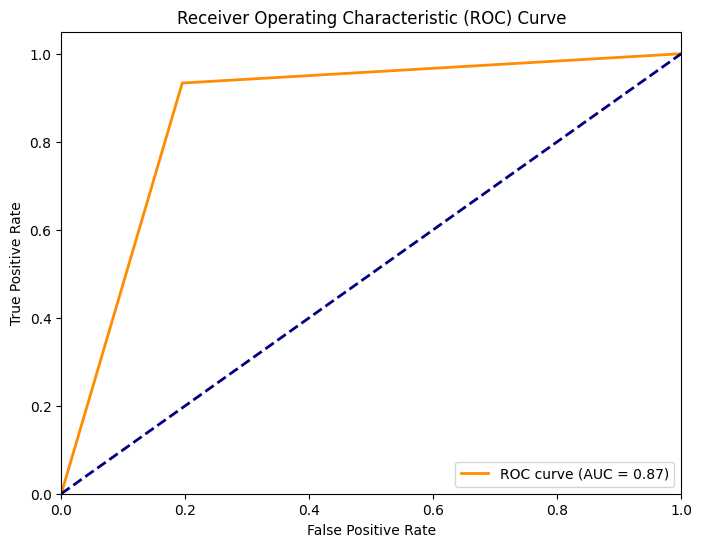

In [173]:
fpr2, tpr2, thresholds2 = roc_curve(Y_test, prediction2)
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

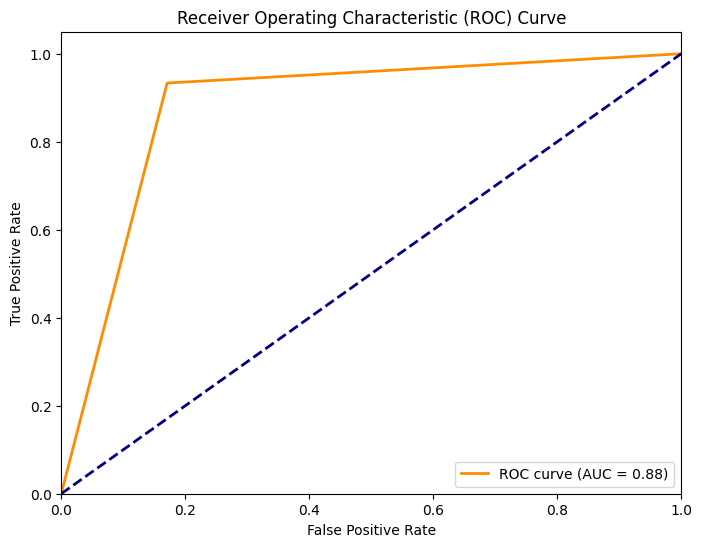

In [174]:
fpr3, tpr3, thresholds3 = roc_curve(Y_test, prediction3)
roc_auc3 = auc(fpr3, tpr3)

plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [175]:
print("Default: " + str(roc_auc_score(Y_test, prediction)))
print("Ramdomized: " +  str(roc_auc_score(Y_test, prediction2)))
print("Grid Search: " +  str(roc_auc_score(Y_test, prediction3)))


Default: 0.8813008130081301
Ramdomized: 0.8691056910569106
Grid Search: 0.8813008130081301


Resultados obtidos com o modelo Random Forest com os diferentes hiperparâmetros:

In [176]:
results = {
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC_SCORE'],
    'DEFAULT': [accuracy, precision, recall, f1, roc_auc],
    'RANDOMIZED_SEARCH_CV': [accuracy2, precision2, recall2, f12, roc_auc2],
    'GRID_SEARCH_CV': [accuracy3, precision3, recall3, f13, roc_auc3]
}


metrics = pd.DataFrame(results)

metrics

,Métrica,DEFAULT,RANDOMIZED_SEARCH_CV,GRID_SEARCH_CV
0,Accuracy,0.857143,0.839286,0.857143
1,Precision,0.666667,0.636364,0.666667
2,Recall,0.933333,0.933333,0.933333
3,F1,0.777778,0.756757,0.777778
4,ROC_AUC_SCORE,0.881301,0.869106,0.881301


In [177]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train,Y_train)
dummy_clf.score(X,Y)

0.6847826086956522

## Conclusões: 

- Em geral, o modelo Random Forest tem um desempenho razoávelmente bom, como podemos ver pelos resultados obtidos quando comparado com o Dummy Classifier.

- Com base no problema, a métrica mais importante é o recall, pois é importante que o modelo consiga detetar o cancro do pulmão, mesmo que isso signifique que o modelo tenha mais falsos positivos, dado que é preferível que o modelo diga que existe cancro do pulmão quando na verdade não existe, do que dizer que não existe cancro do pulmão quando na verdade existe.
